# Previsão para admissão na faculdade

## Introdução

Baseado no [dataset](https://www.kaggle.com/datasets/safaruzzamanshovo/graduate-admission-dataset) do Kaggle, vou criar um modelo utilizando regressão linear que prevê a chance de admissão de novos alunos em universidades mediante seu histórico escolar e notas.

## Análise Exploratória dos Dados (EDA)

Antes de iniciar o modelo, vamos dar uma olhada no dataset e analisar algumas informações.

### Carregando o DataFrame

Vamos começar importando as bibliotecas necessárias e carregar o dataset para começarmos.

In [6]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o dataframe
admission_df = pd.read_csv('graduate_admission.csv')

# Mostrando as 5 primeiras linhas
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Chance of Admit
0,295,96,2,4.9,1.7,2.93,0,0.612
1,340,119,3,4.1,1.7,3.76,0,0.708
2,336,96,1,3.2,1.8,3.12,1,0.728
3,337,108,4,3.4,1.3,2.11,0,0.643
4,323,98,1,1.1,1.3,3.40,0,0.524


Podemos observar que as colunas 'GRE Score' e 'TOEFL Score' estão fora de escala comparadas com as outras, logo vamos precisar normalizar essas colunas para que nosso modelo performe melhor.

In [20]:
# Informações do dataframe
print(f'Há {admission_df.shape[0]} linhas e {admission_df.shape[1]} colunas.')
print('\n')
print('INFORMAÇÕES TÉCNICAS')
print(admission_df.info())

Há 1000 linhas e 8 colunas.


INFORMAÇÕES TÉCNICAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          1000 non-null   int64  
 1   TOEFL Score        1000 non-null   int64  
 2   University Rating  1000 non-null   int64  
 3   SOP                1000 non-null   float64
 4   LOR                1000 non-null   float64
 5   GPA                1000 non-null   float64
 6   Research           1000 non-null   int64  
 7   Chance of Admit    1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB
None


Mediante as informações disponíveis, podemos observar que temos 1000 alunos no dataset e não há valores nulos.

### Gráficos

### Conclusão do EDA

Podemos observar que a maioria das universidades são nota 3 com uma variância de aproximadamente 1.4, logo os alunos admitidos estarão entrando em faculdades com boa reputação. Para isso, a maioria dos alunos conta com notas no TOEFL e GRE (Graduate Record Examination) de 315.8 e 106.4, respectivamente. Para ser aprovado nestes exames é necessário uma nota igual ou superior a 320 no GRE (nesta prova não há um número certo, sendo essa pontuação considerada boa para o exame) e 90 no TOEFL (também não é preciso, apenas uma média considerada aceitável).


## Modelo

### Modelo de regressão

In [19]:
# Correlações com a coluna 'Chance of Admit' (target)
correlation = admission_df.corr()['Chance of Admit']
print(correlation)

GRE Score            0.103643
TOEFL Score          0.095582
University Rating    0.295981
SOP                  0.206102
LOR                  0.246334
GPA                  0.256385
Research             0.760349
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64


In [8]:
# Importando função para separar treino e teste
from sklearn.model_selection import train_test_split

# Separando as features do target
X = admission_df.drop(columns='Chance of Admit') # features
y = admission_df['Chance of Admit'] # target

# Separando em treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conferindo o shape(quantidade) de cada
print(f'Há {X_train.shape[0]} dados de features para treino.')
print(f'Há {X_test.shape[0]} dados de features para teste.')
print(f'Há {y_train.shape[0]} dados de target para treino.')
print(f'Há {y_test.shape[0]} dados de target para teste.')

Há 800 dados de features para treino.
Há 200 dados de features para teste.
Há 800 dados de target para treino.
Há 200 dados de target para teste.


Como pode-se perceber nas colunas, há dados que não estão normalizados entre si, com valores discrepantes. Para isso iremos normalizá-los com a função *StandardScaler* da ScikitLearn.

In [12]:
# Importando alforitmo e função importantes para performance do modelo
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instanciando uma variável para a função da regressão linear
model = LinearRegression()

# Modelando a variável com nossos dados de treino
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# Criando nossas predições
y_pred = model.predict(X_test_scaled)

Agora que treinamos e testamos nosso modelo, vamos avaliá-lo!

### Avaliando o modelo

Vamos começar plotando um gráfico de dispersão, mostrando o valor real X valor predito, e uma linha que representa quando o modelo acerta.

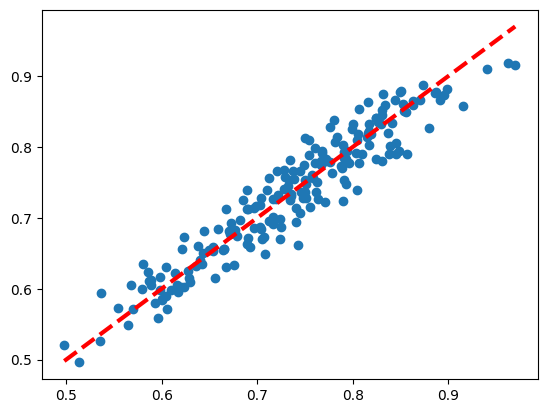

In [14]:
# Plotando o gráfico de dispersão
plt.scatter(y_test, y_pred)
# Criando a linha para melhor análise
plt.plot([y_test.min(), y_test.max()], 
                [y_test.min(), y_test.max()], 
                'r--', lw=3)
# Mostrando o gráfico no nosso output
plt.show()

Visualmente, podemos ver que o modelo parece ter performado bem. Para sabermos melhor, vamosm utilizar de ferramentas estatísticas para avaliar!

#### Usando medidas estatísticas

Vamos utilizar a validação cruzada para avaliar o modelo e depois mostrar as correlações das colunas com o target selecionado.

In [18]:
# Validação cruzada
from sklearn.model_selection import cross_val_score
# Outras métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Instanciando as métricas em variáveis
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mrse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Invocando a função
cross_val = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
# Printando os resultados no output
print(f'R2 ajustado: {cross_val.mean():.3f} (+/- {cross_val.std():.3f})')
print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'mrse:{mrse}')
print(f'mape: {mape}')

R2 ajustado: 0.897 (+/- 0.009)
mae: 0.023421396492906706
mse: 0.000837123726417923
mrse:0.028933090509275415
mape: 0.03210660756538328


Mesmo o modelo apresentando ótimas métricas de avaliação, não podemos tirar conclusões que ele performará da mesma forma com dados novos. Precisaríamos pegar um dataset externo com as mesmas características e testar!

## Conclusão

Pode-se concluir que o nosso modelo, dentro dos dados treinados, performou muito bem. Estou satisfeito com o resultado mas mesmo assim precisamos de dados externos para validar o modelo, ver se realmente ele está treinado adequadamente em novos dados.